In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###Scalar polarizability is given by
###$\alpha_s = \frac{\omega_z^2 w_x w_y λ^2 c \epsilon_0 m}{32 \pi P}$

In [13]:
c = 3e8 #speed of light
e0 =  8.85e-12 #vacuum permitivity
m_at = 1.66053892e-27  #atomic mass
m_Th = 169 
ω_z = 2*pi * 180e3 #oscillation frequency, Hz
W_x = 30e-6 # diamiter, m
W_y = 55e-6 # diamiter, m
λ = 0.53e-6
α0 = 1.65e-41
h = 6.626070040e-34  # plank constant
k_b = 1.3806488e-23  # boltzman constant


p = 1.9 #optical power, W
#$\alpha_s = \frac{\omega_z^2 w_x w_y λ^2 c \epsilon_0 m}{32 \pi P}$
alf_s = (ω_z**2 * W_x *W_y * λ**2) * c * e0 * m_Th * m_at / (32*pi*p)  / α0
print(alf_s)

#polarizability
#(2*pi*250 * w0**2)**2 * c * e0 * m_Th * m_at *pi/ (5)  / alf0

140.15329849974478


In [4]:
def alf_func(f_z, p):
    return ((2 * pi * f_z *1000)**2 * W_x *W_y * λ**2) * c * e0 * m_Th * m_at / (32*pi*p)  / α0

In [6]:
# Первое число - частота в кГц, второе - мощность верди перед входом в ловушку
mess = ((220, 3.8), (180,1.9))

alphas = list(map(alf_func,*zip(*mess)))
print('α_s = ',alphas)

α_s =  [104.68240196585872, 140.15329849974478]


#### Вычисление поляризуемости по сдвигу резонанса в зависимости от мощности верди
###$\alpha = \frac{h \delta\nu \ \epsilon_0 \pi w_x w_y}{4 P}$
###$f(r) = A*\exp(-\frac{U_0}{k_b T}\frac{2 r^2}{w^2})$
###$\delta\nu = \delta\nu_0 \sqrt{\frac{U_0}{U_0 + k_b T}}$
###$\sqrt{}\delta\nu^2 = \delta\nu_0\sqrt{\sqrt{\frac{U_0}{U_0 + 2 k_b T}}-\frac{U_0}{U_0 + k_b T}}$  

In [9]:
f_shift = 0.5e6 #  Hz
p = 2 # Watts
h * f_shift * c * e0 * pi * W_x * W_y / 4 / p / α0

34.54223525522691

###Оценка сдвига и ширины контура в зависимости от мощности 

In [10]:
from scipy.integrate import quad, dblquad, tplquad

In [56]:
def m_b_distrib(r):
    return exp(-U0 / (k_b * T) * 2 * r**2 / w**2)

In [68]:
T = 10e-6
U0 = k_b * 5 * T
w = sqrt(W_x * W_y)

(2.2767581949832e-05, 1.9301551217624134e-13)

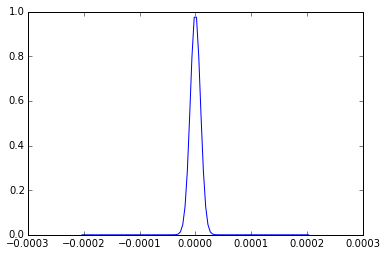

In [69]:
l_x = 5
x = linspace(-l_x*w, +l_x*w, 100)
plot(x,m_b_distrib(x))
quad(m_b_distrib, -5*w,5*w)

In [46]:
m_b_distrib(-3)

1.0

In [70]:
def shift(p):
    return sqrt(p / ( p + 1)) * p

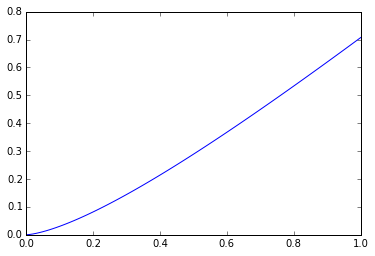

In [72]:
p = linspace(0,1,100)
plot(p, shift(p))

In [73]:
def shift(p):
    return sqrt(sqrt(p / ( p + 2))) * p

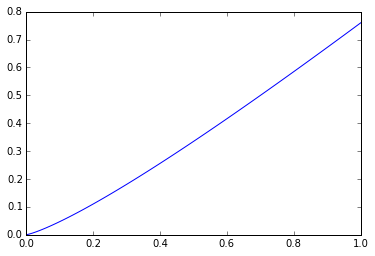

In [74]:
p = linspace(0,1,100)
plot(p, shift(p))